In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Visualisations

In [ ]:
df.head()

,Unnamed: 0,Assigned.ID,Bank,MSA,MinPer,LocMedY,Tractrat,Income,IncRat,UPB,LTV,FedGuar,Term,NumBor,First,BoRace,BoGender,BoAge,Geog,Rate,Front,Back,BoCreditScor,PMI,Self,PropType,BoEth,SpcHsgGoals,AcqTyp
0,2,2092103,Atlanta,99999,92.90,51900,1.4606,210264,4.0513,514837,0.94,2,360,2,2,5,1,60,2,0.0325,0.1446,0.2370,5,0.0,2,PT01,2,2,1
1,4,2092105,Atlanta,19100,25.31,70673,1.4545,164988,2.3403,251800,0.75,2,360,2,2,3,1,55,2,0.0338,0.1657,0.3430,4,0.0,2,PT07,2,2,1
2,5,2092106,Atlanta,33700,71.74,55611,1.0472,56160,1.0537,290613,0.85,2,360,2,2,5,1,48,2,0.0325,0.4062,0.4224,3,0.0,2,PT01,2,2,1
3,6,2092107,Atlanta,45780,11.75,60528,1.0722,115764,1.8762,103000,0.98,2,360,1,2,5,1,55,2,0.0325,0.0760,0.3388,3,0.0,2,PT01,2,2,1
4,7,2092108,Atlanta,26020,30.42,63943,1.0791,94548,1.9535,190000,1.00,2,360,2,2,5,1,68,2,0.0325,0.1419,0.4812,4,0.0,2,PT01,2,2,1


In [ ]:
newdf = df.copy()
newdf = newdf.drop(["Assigned.ID", "Unnamed: 0"], axis = 1)

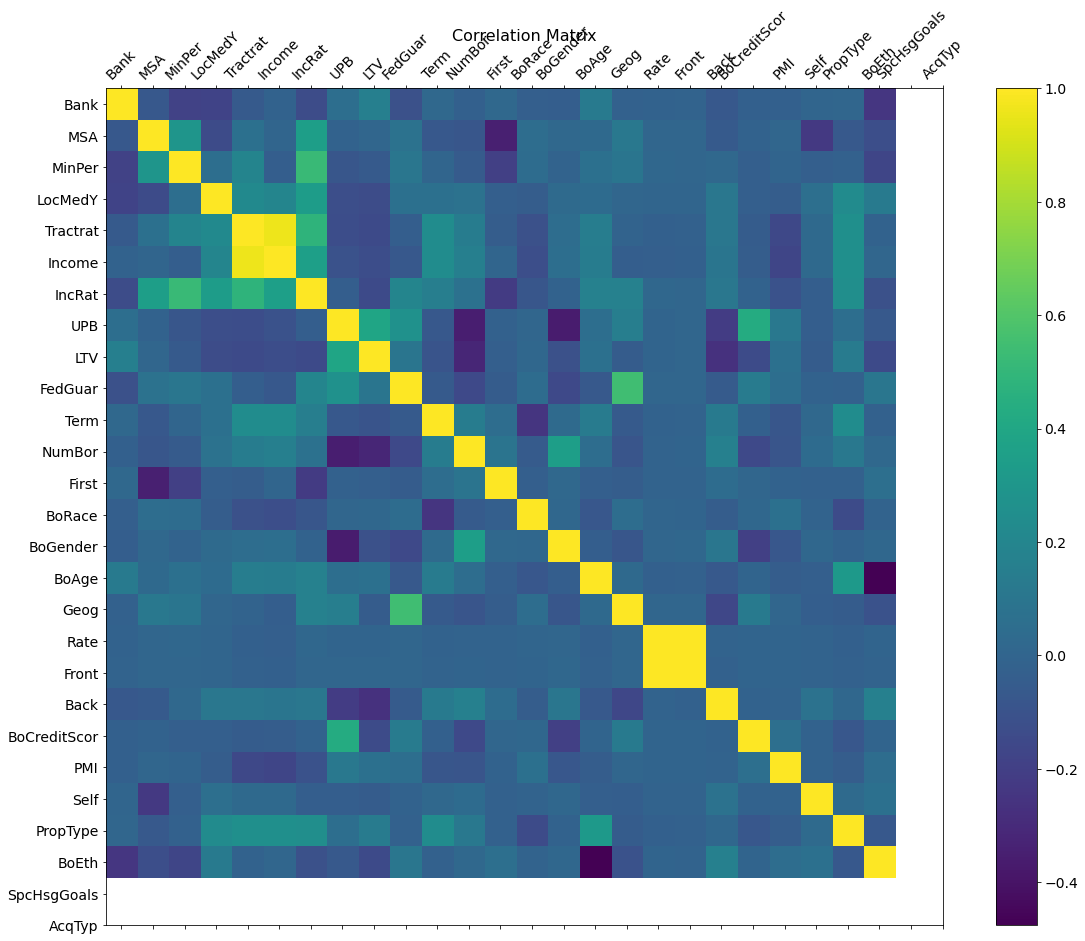

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(newdf.corr(), fignum=f.number)
plt.xticks(range(newdf.shape[1]), newdf.columns, fontsize=14, rotation=45)
plt.yticks(range(newdf.shape[1]), newdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Decision Tree Regressor 

In [ ]:
encodeddf = pd.read_csv("Encoded_data_without_PCA.csv")

In [ ]:
encodeddf.head()

,Unnamed: 0,NumBor,First,Geog,BoCreditScor,Self,SpcHsgGoals,BoRace_2,BoRace_5,BoGender_1,BoGender_2,PropType_PT01,PropType_PT02,PropType_PT07,PropType_PT11,AcqTyp_1,AcqTyp_4,FedGuar_0,FedGuar_1,FedGuar_2,FedGuar_3,BoAge,MinPer,Tractrat,Income,IncRat,UPB,LTV,Term,Rate,Front,Back,PMI,BoRace,BoGender,PropType,AcqTyp,FedGuar,BoEth
0,2,2,0,0,5,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0.538462,0.9290,0.374158,0.049231,0.058919,0.418091,0.808696,1.0,0.285171,0.000523,0.000851,0.0,5,1,PT01,1,2,2
1,4,2,0,0,4,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0.474359,0.2531,0.372595,0.038456,0.033802,0.202094,0.643478,1.0,0.334601,0.000599,0.001234,0.0,3,1,PT07,1,2,2
2,5,2,0,0,3,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0.384615,0.7174,0.268258,0.012557,0.014915,0.233966,0.730435,1.0,0.285171,0.001470,0.001522,0.0,5,1,PT01,1,2,2
3,6,1,0,0,3,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0.474359,0.1175,0.274662,0.026742,0.026989,0.079905,0.843478,1.0,0.285171,0.000275,0.001219,0.0,5,1,PT01,1,2,2
4,7,2,0,0,4,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0.641026,0.3042,0.276430,0.021693,0.028124,0.151346,0.860870,1.0,0.285171,0.000513,0.001734,0.0,5,1,PT01,1,2,2


In [ ]:
X = encodeddf.copy()
# By dropping this combination of input parameters, model gave best coefficient of determination
X = X.drop(["IncRat", "Rate", "PropType", "Front", "Back", "PMI", "AcqTyp", "BoEth"], axis = 1)

In [ ]:
X.head(3)

,Unnamed: 0,NumBor,First,Geog,BoCreditScor,Self,SpcHsgGoals,BoRace_2,BoRace_5,BoGender_1,BoGender_2,PropType_PT01,PropType_PT02,PropType_PT07,PropType_PT11,AcqTyp_1,AcqTyp_4,FedGuar_0,FedGuar_1,FedGuar_2,FedGuar_3,BoAge,MinPer,Tractrat,Income,IncRat,UPB,LTV,Term,BoRace,BoGender,FedGuar
0,2,2,0,0,5,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0.538462,0.9290,0.374158,0.049231,0.058919,0.418091,0.808696,1.0,5,1,2
1,4,2,0,0,4,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0.474359,0.2531,0.372595,0.038456,0.033802,0.202094,0.643478,1.0,3,1,2
2,5,2,0,0,3,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0.384615,0.7174,0.268258,0.012557,0.014915,0.233966,0.730435,1.0,5,1,2


In [ ]:
# Rate is the target variable
y = encodeddf[["Rate"]]
y.head(3)

,Rate
0,0.285171
1,0.334601
2,0.285171


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Create a decision tree regressor and fit it to the training set

from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

In [ ]:
# Report the score of the prediction using the testing set

from sklearn.model_selection import cross_val_score

score = regressor.score(X_test, y_test)

print(score)

0.2567273909628265
